# Exercise/Example: the biggest Earthquake in the UK this Century

## The Problem

`GeoJSON` is a json-based file format for sharing geographic data. One example dataset is the USGS earthquake data:

In [66]:
import requests

quakes = requests.get(
    "http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
    params={
        "starttime": "2000-01-01",
        "maxlatitude": "58.723",
        "minlatitude": "50.008",
        "maxlongitude": "1.67",
        "minlongitude": "-9.756",
        "minmagnitude": "1",
        "endtime": "2021-01-19",
        "orderby": "time-asc",
    },
)

In [67]:
quakes.text[0:800]

'{"type":"FeatureCollection","metadata":{"generated":1642605163000,"url":"https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime=2000-01-01&maxlatitude=58.723&minlatitude=50.008&maxlongitude=1.67&minlongitude=-9.756&minmagnitude=1&endtime=2021-01-19&orderby=time-asc","title":"USGS Earthquakes","status":200,"api":"1.12.3","count":128},"features":[{"type":"Feature","properties":{"mag":2.6,"place":"12 km NNW of Penrith, United Kingdom","time":956553055700,"updated":1415322596133,"tz":null,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst","detail":"https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson","felt":null,"cdi":null,"mmi":null,"alert":null,"status":"reviewed","tsunami":0,"sig":104,"net":"us","code":"p0009rst","ids":",usp0009rs'

In [68]:
import json

In [69]:
quake_json = json.loads(quakes.text)

### Write data to a readable file

In [70]:
with open("quakes.json", "w") as outfile:
    json.dump(quake_json, outfile, indent=4)


### Find largest magnitude earthquake

In [71]:
largest_so_far = quake_json["features"][0]["properties"]["mag"]
largest_so_far_item = quake_json["features"][0]
for feat in quake_json["features"]:
    if feat["properties"]["mag"] >  largest_so_far:
        largest_so_far = feat["properties"]["mag"]
        largest_so_far_item = feat

### Investigate largest magnitude earthquake

In [72]:
place = largest_so_far_item["properties"]["place"]
lat = largest_so_far_item["geometry"]["coordinates"][1]
long = largest_so_far_item["geometry"]["coordinates"][0]
print("Place: {}, Latitude: {} Longitude: {}".format(place, lat, long))

Place: 2 km ESE of Wombourn, United Kingdom, Latitude: 52.52 Longitude: -2.15


### Plot

In [73]:
import requests


def request_map_at(lat, long, satellite=True, zoom=10, size=(400, 400)):
    base = "https://static-maps.yandex.ru/1.x/?"

    params = dict(
        z=zoom,
        size="{},{}".format(size[0], size[1]),
        ll="{},{}".format(long, lat),
        l="sat" if satellite else "map",
        lang="en_US",
    )

    return requests.get(base, params=params)

In [74]:
map_png = request_map_at(lat, long, zoom=10, satellite=False)

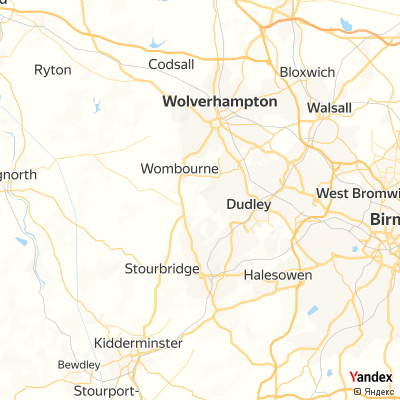

In [75]:
from IPython.display import Image

Image(map_png.content)

### Investigate if there were more earthquakes with same magnitude

In [76]:
largest_mag_earthquakes = [
    feat
    for feat in quake_json["features"]
    if feat["properties"]["mag"] == largest_so_far
]


for eq in largest_mag_earthquakes:
    place = eq["properties"]["place"]
    lat = eq["geometry"]["coordinates"][1]
    long = eq["geometry"]["coordinates"][0]
    print("Place: {}, Latitude: {} Longitude: {}".format(place, lat, long))

Place: 2 km ESE of Wombourn, United Kingdom, Latitude: 52.52 Longitude: -2.15
Place: 1 km NNE of Market Rasen, United Kingdom, Latitude: 53.403 Longitude: -0.332


In [77]:
with open("largest_quakes.json", "w") as outfile:
    json.dump(largest_mag_earthquakes, outfile, indent=4)

In [78]:
# this works because there are only two items in largest_mag_earthquakes, therefore the lastly declared values of lat and long correspond to te second item
# otherwise we'd need to declare these values adequately for proper plotting 
map_png_2 = request_map_at(lat, long, zoom=10, satellite=False)

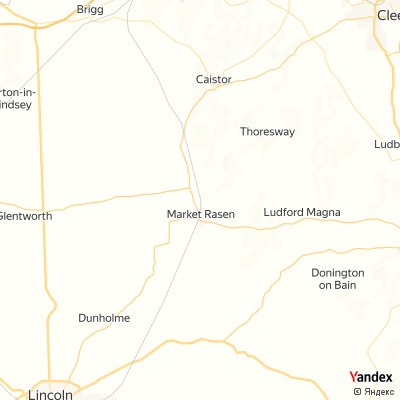

In [79]:
from IPython.display import Image

Image(map_png_2.content)

## Your exercise

Determine the **location** of the **largest magnitude** earthquake in the UK this century.

You can break this exercise down into several subtasks. You'll need to:
### Load the data
* Get the text of the web result
* Parse the data as JSON

### Investigate the data
* Understand how the data is structured into dictionaries and lists
   * Where is the magnitude?
   * Where is the place description or coordinates?
   
### Search through the data
* Program a search through all the quakes to find the biggest quake
* Find the place of the biggest quake

### Visualise your answer
* Form a URL for an online map service at that latitude and longitude: look back at the introductory example
* Display that image